# DarkELF electron recoil notebook

This notebook is meant to illustrate the main features of the darkELF package for calculating electron recoil rates.

written by Tongyan Lin & Simon Knapen, 04/20/2021

In [1]:
%matplotlib inline

import sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import rc, rcParams
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Make use of TeX\ufeff
rc('text',usetex=True)
# Change all fonts to 'Computer Modern'
rc('font',**{'size':14, 'family':'serif','serif':['Times New Roman']})
rc('xtick.major', size=5, pad=7)
rc('xtick', labelsize=15)
rc('ytick.major', size=5, pad=7)
rc('ytick', labelsize=15)

# uses matplotlib-label-lines, see for example https://github.com/cphyc/matplotlib-label-lines
from labellines import labelLine, labelLines

# this needs to point to the folder where darkelf.py is stored
work_dir = os.getcwd()
sys.path.append(work_dir+"/..")
plotdir=work_dir+"/plots/"

from darkelf import darkelf, targets

Import the package. For each material we want to study, we will create a darkELF object. The user must also specify the file from which the dielectric function will be imported, which can be found in the data folder corresponding to the material of interest. The dark matter mass is also set at this stage. It can be updated with the update_param() function (see below), without having to create a new darkELF object.

List the available materials

In [2]:
targets.list_all()

	 Al2O3
	 GaN
	 Al
	 Untitled.ipynb
	 ZnS
	 GaAs
	 SiO2
	 Si
	 Ge
	 SiC
	 C
	 Xe


List the available ELF extractions for an example material. If the user add their own ELF extraction, it should show up in this list if placed in the proper folder.

In [3]:
targets.files('GaAs')

Available configuration files: 
	 GaAs.yaml
 
Available data for epsilon: 
	 GaAs_mermin.dat
	 Ga_pDOS.dat
	 Ga_atomic_Zion.dat
	 As_pDOS.dat
	 As_atomic_Zion.dat
	 GaAs_epsphonon_data10K.dat
 
Available data for phonon density of states: 
 
Available data for phonon partial density of states: 
 
Available data for Fn(omega) functions: 
	 As_Fn.dat
	 Ga_Fn.dat
 
Available data for form factors: 


- Si_mermin.dat, Si_gpaw_noLFE.dat and Si_gpaw_withLFE.dat are various ELF extractions in the electron regime. 
- Si_Migdal_FAC.dat refers to the matrix element for the atomic Migdal effect, as computed by Ibe et al. It will be loaded automatically.
- Si_epsphonon_theory6K.dat and Si_epsphonon_data6K.dat are ELF extractions for the phonon regime, see darkelf_phonon.ipynb

In [4]:
mX=1.0e8 # specify the dark matter mass

# create an object for each target material. This reads in precalculated tables for the ELF and interpolates them
# For Si and Ge, we will create a separate darkelf object with the Mermin and GPAW grids, to compare both calculations. 
Si_gpaw = darkelf(target='Si',mX=mX,filename="Si_gpaw_withLFE.dat")
Si = darkelf(target='Si',mX=mX,filename="Si_mermin.dat")

Ge_gpaw = darkelf(target='Ge',mX=mX,filename="Ge_gpaw_withLFE.dat")
Ge = darkelf(target='Ge',mX=mX,filename="Ge_mermin.dat")

GaAs = darkelf(target='GaAs',mX=mX,filename="GaAs_mermin.dat")

GaN = darkelf(target='GaN',mX=mX,filename="GaN_mermin.dat")

Al = darkelf(target='Al',mX=mX,filename="Al_mermin.dat")

SiO2 = darkelf(target='SiO2',mX=mX,filename="SiO2_mermin.dat")

ZnS = darkelf(target='ZnS',mX=mX,filename="ZnS_mermin.dat")

# example on how to load the ELF for the phonon regime
Al2O3 = darkelf(target='Al2O3',mX=mX,filename="Al2O3_mermin.dat",phonon_filename="Al2O3_epsphonon_o.dat") 

target_list=[Al,Al2O3,GaAs,GaN,Ge,Si,SiO2,ZnS]

 .... Loading files for Si
Loaded Si_gpaw_withLFE.dat for epsilon in electron regime
electronic ELF taken or calculated from J. Enkovaara et al.,Electronic structure calculations with GPAW: a real-space implementation of the projector augmented-wave method,Journal of Physics:Condensed Matter22(2010) 253202.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename to perform data-driven, single phonon calculations
Zion(k) for Migdal calculation taken or calculated from: P. J. Brown, A. G. Fox, E. N. Maslen, M. A. OKeefe,and B. T. M. Willis, “Intensity of diffracted intensities,” in International Tables for Crystallography (American Cancer Society, 2006) Chap. 6.1, pp. 554–595, https://onlinelibrary.wiley.com/doi/pdf/10.1107/97809553602060000
Loaded Si_atomic_Zion.dat for dark photon couplings
Loaded Si_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  Si_DoS.dat
 .... Loading files for Si
Loaded Si_mermin.dat for epsilon 

 .... Loading files for Al2O3
Loaded Al2O3_mermin.dat for epsilon in electron regime
electronic ELF taken or calculated from Y. Sun, H. Xu, B. Da, S.-f. Mao and Z.-j. Ding, Calculations of Energy-Loss Function for 26 Materials, Chinese Journal of Chemical Physics9(2016) 663.
phonon ELF taken or calculated from  F. Gervais and B. Piriou, Anharmonicity in several-polar-mode crystals:  adjusting phonon self-energy of LO and TO modes in Al2O3 and TiO2 to fit infrared reflectivity,Journal of Physics C Solid State Physics 7 (1974) 2374 and M. Schubert, T.E. Tiwald and C.M. Herzinger, Infrared dielectric anisotropy and phonon modes of sapphire, Phys. Rev. B61(2000) 8187
Loaded Al2O3_epsphonon_o.dat for epsilon in phonon regime
Warning! Atomic Migdal calculation not present
Warning! Momentum Zion not loaded. Using Z - number of valence electrons.
Warning! Dark photon fd not loaded. Need to set fd_filename for both atoms
Warning! Density of states not loaded. Need to set dos_filename for both a

In [5]:
Ge_gpaw.e0+Ge_gpaw.E_gap

3.57

Darkelf produced some warning messages here, but don't be scared:
- it noticed we did not specify a filename for the ELF in the phonon regime. This is fine, because in this notebook we are only concerned with e- recoils.
- it noticed that the Ibe et al Migdal calculation is not available for some materials, due to the absense of a "*_Migdal_FAC.dat" file. This is fine too, since we will not be concerned with Migdal in this notebook.

Suppose we want to study a different value for the dark matter or mediator mass, we can update the original values as follows:

In [6]:
?Si.update_params

For example

In [7]:
Si.update_params(mX=1e7, mediator='massless') # set massless mediator limit
Si.DM_params()
print("-------")
Si.update_params(mX=1e6, mMed=10.) # set specific mediator mass. This takes precendent over the "mediator" flag.
Si.DM_params()

mX = 10000000.0 eV
mMed = 0.0 eV
delta = 0.0 eV
-------
mX = 1000000.0 eV
mMed = 10.0 eV
delta = 0.0 eV


## Differential rate

Plot the differential spectrum.

In [7]:
?Si.dRdomega_electron

Signature:
Si.dRdomega_electron(
    omega,
    sigmae=1e-38,
    kcut=0,
    withscreening=True,
    method='grid',
)
Docstring:
Returns differential rate for DM-electron scattering in 1/kg/yr/eV

Inputs
------
omega: float or array
    electron excitation energy in [eV]
sigmae: float
    cross section in [cm^2]
kcut: float
    option to include a maximum k value in the integration (helpful if you
    wish to avoid to using ELF in high k regime where it may be more uncertain)
    if kcut=0 (default), the integration is cut off at the highest k-value of the grid at hand
withscreening: Boolean
    whether to include the 1/|epsilon|^2 factor in the scattering rate
method: ["grid","Lindhard"]
    use interpolated grid of epsilon, or Lindhard analytic epsilon
File:      ~/Documents/work/projects/DM_stuff/darkELF_public/darkelf/electron.py
Type:      method


The function can be broadcasted over a list

Now compare a number of different materials

Al
Al2O3
GaAs
GaN
Ge
Si
SiO2
ZnS


/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_87815/1928946090.py:21: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  axs[0].set_yscale("Log")


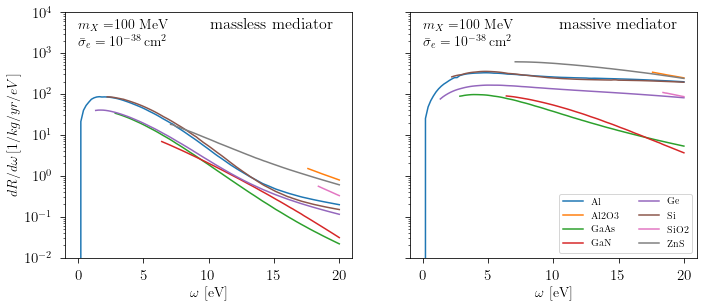

In [12]:
fig, axs = plt.subplots(1,2,figsize=(10, 4.5),sharey=True)

cmap = plt.get_cmap('Spectral')
colors = cmap(np.linspace(0.0,1.0,8))

for target in target_list:
    print(target.target)
    olist=np.linspace(2.0*target.E_gap,20.0,100)
    
    # massless mediator
    target.update_params(mX=1e8, mediator='massless')
    Rlist=target.dRdomega_electron(olist,method="grid",sigmae=1e-38, kcut=0, withscreening=True)
    axs[0].plot(olist,Rlist,label=target.target)
    
    # massive mediator
    target.update_params(mX=1e8, mediator='massive')
    Rlist=target.dRdomega_electron(olist,method="grid",sigmae=1e-38, kcut=0, withscreening=True)
    axs[1].plot(olist,Rlist,label=target.target)
    
    
axs[0].set_yscale("Log")
axs[1].legend(ncol=2,fontsize=10,loc="lower right")
axs[0].set_ylim([1e-2,1e4])

axs[0].text(0,4e3,"$m_X=$"+str(int(Si.mX*1e-6))+" MeV",fontsize=14,backgroundcolor="white")
axs[0].text(0,1.5e3,r"$\bar \sigma_e=10^{-38}\,\mathrm{cm}^{2}$",fontsize=14,backgroundcolor="white")
axs[0].text(19.5,4e3,r"massless mediator",fontsize=16,backgroundcolor="white",horizontalalignment="right")

axs[1].text(0,4e3,"$m_X=$"+str(int(Si.mX*1e-6))+" MeV",fontsize=14,backgroundcolor="white")
axs[1].text(0,1.5e3,r"$\bar \sigma_e=10^{-38}\,\mathrm{cm}^{2}$",fontsize=14,backgroundcolor="white")
axs[1].text(19.5,4e3,r"massive mediator",fontsize=16,backgroundcolor="white",horizontalalignment="right")

axs[0].set_xlabel("$\omega$ [eV]")
axs[1].set_xlabel("$\omega$ [eV]")
axs[0].set_ylabel("$dR/d\omega\, [1/kg/yr/eV]$")

fig.tight_layout()
fig.subplots_adjust(wspace = 0.2)

fig.savefig(plotdir+"darkelf_electron_1.pdf",bbox_inches='tight')

A more detailed comparison of the different methods, for Si and Ge. The Lindhard method is accessed through the method="Lindhard" flag. Also compare with QEdark 1509.01598.

In [13]:
# computed with QEdark http://ddldm.physics.sunysb.edu/ddlDM/
Si_QEdarkR=np.array([0., 28.8539, 181.822, 172.255, 168.75, 141.052, 40.1344, 50.867, \
18.663, 11.7896, 8.49707, 5.9872, 2.34393, 2.2157, 1.49057, 0.762501, \
0.521987, 0.204655, 0.118796, 0.0806802, 0.0943422, 0.0458298, \
0.0446392, 0.0208146, 0.0123043, 0.00939938, 0.003575, 0.00435233, \
0.00221522, 0.00206522])
Si_QEdarkomega=np.linspace(1,30,len(Si_QEdarkR))

Ge_QEdarkR=np.array([0.137646, 56.0119, 159.794, 7.89037, 47.2741, 32.5871, 35.3106, \
20.176, 2.36467, 4.60623, 3.0541, 1.78161, 1.0093, 0.391259, \
0.464129, 0.177826, 0.162103, 0.0747297, 0.0237693, 0.0175873, \
0.00983334, 0.00748947, 0.00384261, 0.00327606, 0.00134135, \
0.0172274, 0.0206602, 0.00456985, 0.00359018, 0.0017817])
Ge_QEdarkomega=np.linspace(1,30,len(Ge_QEdarkR))

Massless mediator

/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_87815/3868484548.py:38: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  axs[0].set_yscale("Log")


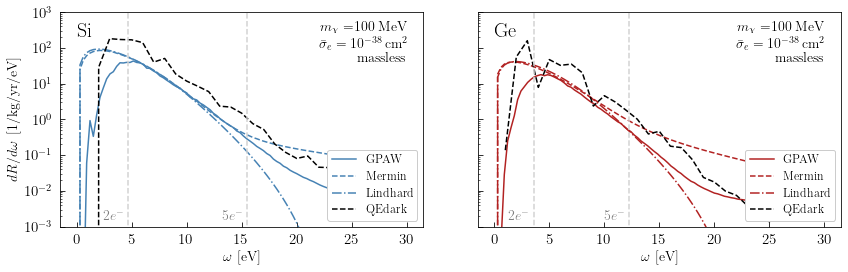

In [14]:
fig, axs = plt.subplots(1,2,figsize=(12, 4),sharey=True)

Si_2e_threshold=Si.E_gap+Si.e0
Ge_2e_threshold=Ge.E_gap+Ge.e0

Si_5e_threshold=Si.E_gap+4.0*Si.e0
Ge_5e_threshold=Ge.E_gap+4.0*Ge.e0

Si.update_params(mX=1e8,mediator='massless')
Si_gpaw.update_params(mX=1e8,mediator='massless')
Ge.update_params(mX=1e8,mediator='massless')
Ge_gpaw.update_params(mX=1e8,mediator='massless')

olist=np.linspace(0.0,30.0,100)

# Si
Rlist=Si_gpaw.dRdomega_electron(olist,method="grid")
axs[0].plot(olist,Rlist,color="steelblue",label="GPAW")

Rlist=Si.dRdomega_electron(olist,method="grid")
axs[0].plot(olist,Rlist,"--",color="steelblue",label="Mermin")

Rlist=Si_gpaw.dRdomega_electron(olist,method="Lindhard")
axs[0].plot(olist,Rlist,"-.",color="steelblue",label="Lindhard")

axs[0].plot(Si_QEdarkomega,Si_QEdarkR,"--",color="black",label="QEdark")

axs[0].plot([Si_2e_threshold,Si_2e_threshold],[1e-5,1e3],"--",color="lightgray")
axs[0].plot([Si_5e_threshold,Si_5e_threshold],[1e-5,1e3],"--",color="lightgray")

axs[0].text(0,2e2,"Si",fontsize=20)
axs[0].text(30,3e2,"$m_\chi=$"+str(int(Si.mX*1e-6))+" MeV",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[0].text(30,1e2,r"$\bar \sigma_e=10^{-38}\,\mathrm{cm}^{2}$",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[0].text(30,4e1,r"massless",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[0].text(Si_2e_threshold-0.4,1.5e-3,"$2e^-$",fontsize=14,color="gray",horizontalalignment="right")
axs[0].text(Si_5e_threshold-0.4,1.5e-3,"$5e^-$",fontsize=14,color="gray",horizontalalignment="right")

axs[0].set_yscale("Log")
axs[0].set_ylim([1e-3,1e3])
axs[0].legend(fontsize=12,loc="lower right",framealpha=1.0)
axs[0].tick_params(direction='in',which='both')
axs[0].set_xlabel("$\omega$ [eV]")
axs[0].set_ylabel("$dR/d\omega\,$ [1/kg/yr/eV]")


# Ge
Rlist=Ge_gpaw.dRdomega_electron(olist,method="grid")
axs[1].plot(olist,Rlist,color="Firebrick",label="GPAW")

Rlist=Ge.dRdomega_electron(olist,method="grid")
axs[1].plot(olist,Rlist,"--",color="Firebrick",label="Mermin")

Rlist=Ge_gpaw.dRdomega_electron(olist,method="Lindhard")
axs[1].plot(olist,Rlist,"-.",color="Firebrick",label="Lindhard")

axs[1].plot(Ge_QEdarkomega,Ge_QEdarkR,"--",color="black",label="QEdark")

axs[1].plot([Ge_2e_threshold,Ge_2e_threshold],[1e-5,1e3],"--",color="lightgray")
axs[1].plot([Ge_5e_threshold,Ge_5e_threshold],[1e-5,1e3],"--",color="lightgray")

axs[1].text(0,2e2,"Ge",fontsize=20)
axs[1].text(30,3e2,"$m_\chi=$"+str(int(Ge.mX*1e-6))+" MeV",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[1].text(30,1e2,r"$\bar \sigma_e=10^{-38}\,\mathrm{cm}^{2}$",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[1].text(30,4e1,r"massless",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[1].text(Ge_2e_threshold-0.4,1.5e-3,"$2e^-$",fontsize=14,color="gray",horizontalalignment="right")
axs[1].text(Ge_5e_threshold-0.4,1.5e-3,"$5e^-$",fontsize=14,color="gray",horizontalalignment="right")
axs[1].legend(fontsize=12,loc="lower right",framealpha=1.0)
axs[1].tick_params(direction='in',which='both')
axs[1].set_xlabel("$\omega$ [eV]")

fig.tight_layout()
fig.subplots_adjust(wspace = 0.15)

fig.savefig(plotdir+"darkelf_electron_2.pdf",bbox_inches='tight')

The agreement between GPAW and Mermin is very good between 2 and 5 ionization e-. Discrepancy with QEdark is due to screening, which is not included in the QEdark computation.

Now the massive mediator:

/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_87815/1113216288.py:37: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  axs[0].set_yscale("Log")


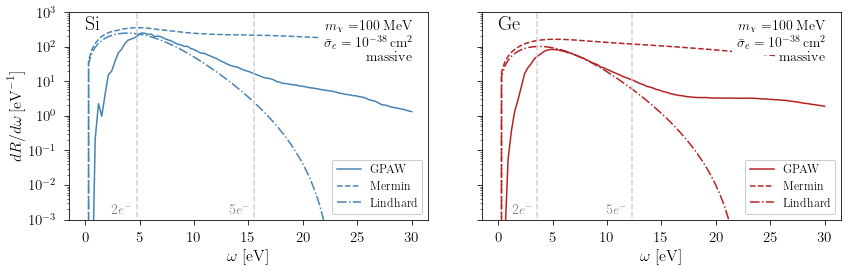

In [15]:
fig, axs = plt.subplots(1,2,figsize=(12, 4),sharey=True)

Si_2e_threshold=Si.E_gap+Si.e0
Ge_2e_threshold=Ge.E_gap+Ge.e0

Si_5e_threshold=Si.E_gap+4.0*Si.e0
Ge_5e_threshold=Ge.E_gap+4.0*Ge.e0

Si.update_params(mX=1e8,mediator='massive')
Si_gpaw.update_params(mX=1e8,mediator='massive')
Ge.update_params(mX=1e8,mediator='massive')
Ge_gpaw.update_params(mX=1e8,mediator='massive')

olist=np.linspace(0.0,30.0,100)

# Si
Rlist=Si_gpaw.dRdomega_electron(olist,method="grid")
axs[0].plot(olist,Rlist,color="steelblue",label="GPAW")

Rlist=Si.dRdomega_electron(olist,method="grid")
axs[0].plot(olist,Rlist,"--",color="steelblue",label="Mermin")

Rlist=Si_gpaw.dRdomega_electron(olist,method="Lindhard")
axs[0].plot(olist,Rlist,"-.",color="steelblue",label="Lindhard")


axs[0].plot([Si_2e_threshold,Si_2e_threshold],[1e-5,1e3],"--",color="lightgray")
axs[0].plot([Si_5e_threshold,Si_5e_threshold],[1e-5,1e3],"--",color="lightgray")

axs[0].text(0,3e2,"Si",fontsize=20)
axs[0].text(30,3e2,"$m_\chi=$"+str(int(Ge.mX*1e-6))+" MeV",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[0].text(30,1e2,r"$\bar \sigma_e=10^{-38}\,\mathrm{cm}^{2}$",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[0].text(30,4e1,r"massive",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[0].text(Si_2e_threshold-0.4,1.5e-3,"$2e^-$",fontsize=14,color="gray",horizontalalignment="right")
axs[0].text(Si_5e_threshold-0.4,1.5e-3,"$5e^-$",fontsize=14,color="gray",horizontalalignment="right")

axs[0].set_yscale("Log")
axs[0].set_ylim([1e-3,1e3])
axs[0].legend(fontsize=12,loc="lower right",framealpha=1.0)
axs[0].set_xlabel("$\omega$ [eV]",fontsize=16)
axs[0].set_ylabel("$dR/d\omega\, [\mathrm{eV}^{-1}]$",fontsize=16)


# Ge
Rlist=Ge_gpaw.dRdomega_electron(olist,method="grid")
axs[1].plot(olist,Rlist,color="Firebrick",label="GPAW")

Rlist=Ge.dRdomega_electron(olist,method="grid")
axs[1].plot(olist,Rlist,"--",color="Firebrick",label="Mermin")

Rlist=Ge_gpaw.dRdomega_electron(olist,method="Lindhard")
axs[1].plot(olist,Rlist,"-.",color="Firebrick",label="Lindhard")

axs[1].plot([Ge_2e_threshold,Ge_2e_threshold],[1e-5,1e3],"--",color="lightgray")
axs[1].plot([Ge_5e_threshold,Ge_5e_threshold],[1e-5,1e3],"--",color="lightgray")

axs[1].text(0,3e2,"Ge",fontsize=20)
axs[1].text(30,3e2,"$m_\chi=$"+str(int(Ge.mX*1e-6))+" MeV",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[1].text(30,1e2,r"$\bar \sigma_e=10^{-38}\,\mathrm{cm}^{2}$",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[1].text(30,4e1,r"massive",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[1].text(Ge_2e_threshold-0.4,1.5e-3,"$2e^-$",fontsize=14,color="gray",horizontalalignment="right")
axs[1].text(Ge_5e_threshold-0.4,1.5e-3,"$5e^-$",fontsize=14,color="gray",horizontalalignment="right")
axs[1].legend(fontsize=12,loc="lower right",framealpha=1.0)
axs[1].set_xlabel("$\omega$ [eV]",fontsize=16)

fig.tight_layout()
fig.subplots_adjust(wspace = 0.15)

fig.savefig(plotdir+"darkelf_electron_3.pdf",bbox_inches='tight')

The agreement between Mermin and GPAW is very poor at the moment. The reason is the discrepancy in the ELF at high k, as explained in Section II of the paper. We can cross check this most easily by restricting the phase to e.g. k < 12 keV. This leads to better agreement, indicating that the high k regime is responsible:

/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_87815/1110585544.py:39: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  axs[0].set_yscale("Log")


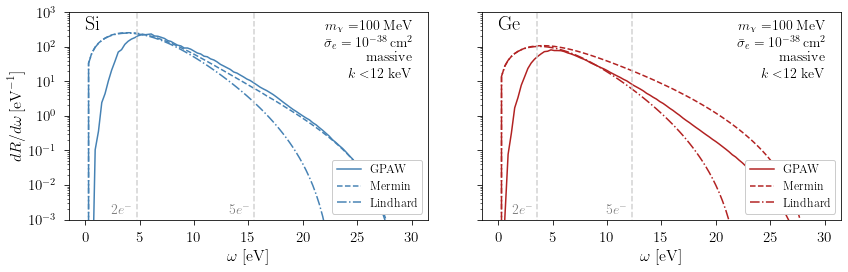

In [16]:
fig, axs = plt.subplots(1,2,figsize=(12, 4),sharey=True)

kcut=1.2e4 # restrict phase space
Si_2e_threshold=Si.E_gap+Si.e0
Ge_2e_threshold=Ge.E_gap+Ge.e0

Si_5e_threshold=Si.E_gap+4.0*Si.e0
Ge_5e_threshold=Ge.E_gap+4.0*Ge.e0

Si.update_params(mX=1e8,mediator='massive')
Si_gpaw.update_params(mX=1e8,mediator='massive')
Ge.update_params(mX=1e8,mediator='massive')
Ge_gpaw.update_params(mX=1e8,mediator='massive')

olist=np.linspace(0.0,30.0,100)

# Si
Rlist=Si_gpaw.dRdomega_electron(olist,method="grid",kcut=kcut)
axs[0].plot(olist,Rlist,color="steelblue",label="GPAW")

Rlist=Si.dRdomega_electron(olist,method="grid",kcut=kcut)
axs[0].plot(olist,Rlist,"--",color="steelblue",label="Mermin")

Rlist=Si_gpaw.dRdomega_electron(olist,method="Lindhard",kcut=kcut)
axs[0].plot(olist,Rlist,"-.",color="steelblue",label="Lindhard")


axs[0].plot([Si_2e_threshold,Si_2e_threshold],[1e-5,1e3],"--",color="lightgray")
axs[0].plot([Si_5e_threshold,Si_5e_threshold],[1e-5,1e3],"--",color="lightgray")

axs[0].text(0,3e2,"Si",fontsize=20)
axs[0].text(30,3e2,"$m_\chi=$"+str(int(Ge.mX*1e-6))+" MeV",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[0].text(30,1e2,r"$\bar \sigma_e=10^{-38}\,\mathrm{cm}^{2}$",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[0].text(30,4e1,r"massive",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[0].text(30,1.2e1,r"$k<$12 keV",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[0].text(Si_2e_threshold-0.4,1.5e-3,"$2e^-$",fontsize=14,color="gray",horizontalalignment="right")
axs[0].text(Si_5e_threshold-0.4,1.5e-3,"$5e^-$",fontsize=14,color="gray",horizontalalignment="right")

axs[0].set_yscale("Log")
axs[0].set_ylim([1e-3,1e3])
axs[0].legend(fontsize=12,loc="lower right",framealpha=1.0)
axs[0].set_xlabel("$\omega$ [eV]",fontsize=16)
axs[0].set_ylabel("$dR/d\omega\, [\mathrm{eV}^{-1}]$",fontsize=16)


# Ge
Rlist=Ge_gpaw.dRdomega_electron(olist,method="grid",kcut=kcut)
axs[1].plot(olist,Rlist,color="Firebrick",label="GPAW")

Rlist=Ge.dRdomega_electron(olist,method="grid",kcut=kcut)
axs[1].plot(olist,Rlist,"--",color="Firebrick",label="Mermin")

Rlist=Ge_gpaw.dRdomega_electron(olist,method="Lindhard",kcut=kcut)
axs[1].plot(olist,Rlist,"-.",color="Firebrick",label="Lindhard")

axs[1].plot([Ge_2e_threshold,Ge_2e_threshold],[1e-5,1e3],"--",color="lightgray")
axs[1].plot([Ge_5e_threshold,Ge_5e_threshold],[1e-5,1e3],"--",color="lightgray")

axs[1].text(0,3e2,"Ge",fontsize=20)
axs[1].text(30,3e2,"$m_\chi=$"+str(int(Ge.mX*1e-6))+" MeV",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[1].text(30,1e2,r"$\bar \sigma_e=10^{-38}\,\mathrm{cm}^{2}$",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[1].text(30,4e1,r"massive",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[1].text(30,1.2e1,r"$k<$12 keV",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[1].text(Ge_2e_threshold-0.4,1.5e-3,"$2e^-$",fontsize=14,color="gray",horizontalalignment="right")
axs[1].text(Ge_5e_threshold-0.4,1.5e-3,"$5e^-$",fontsize=14,color="gray",horizontalalignment="right")
axs[1].legend(fontsize=12,loc="lower right",framealpha=1.0)
axs[1].set_xlabel("$\omega$ [eV]",fontsize=16)

fig.tight_layout()
fig.subplots_adjust(wspace = 0.15)

fig.savefig(plotdir+"darkelf_electron_4.pdf",bbox_inches='tight')

For a select number of materials, the rate in terms of the number of ionization electrons is available as well.

In [13]:
?Si.dRdQ_electron

Signature:
Si.dRdQ_electron(
    Q,
    sigmae=1e-38,
    kcut=0,
    withscreening=True,
    method='grid',
)
Docstring:
Returns differential rate in terms of the charge yield for DM-electron scattering in 1/kg/yr. Available for select materials

Inputs
------
Q: integer or list of integers
    number of ionization electrons    
sigmae: float
    cross section in [cm^2]
kcut: float
    option to include a maximum k value in the integration (helpful if you
    wish to avoid to using ELF in high k regime where it may be more uncertain)
    if kcut=0 (default), the integrating is cut off at the highest k-value of the grid at hand
withscreening: Boolean
    whether to include the 1/|epsilon|^2 factor in the scattering rate
method: ["grid","Lindhard"]
    use interpolated grid of epsilon, or Lindhard analytic epsilon
File:      ~/Documents/work/projects/DM_stuff/darkELF_public/darkelf/electron.py
Type:      method


/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_87815/2152377821.py:29: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  axs[0].set_yscale("Log")


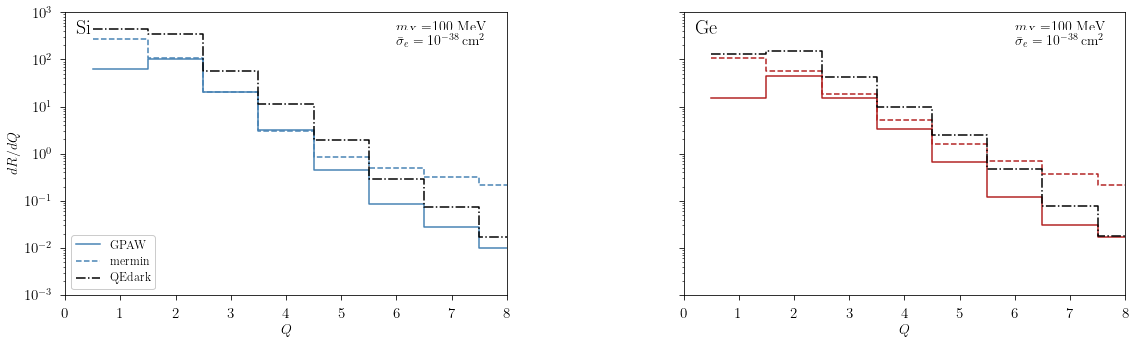

In [17]:
fig, axs = plt.subplots(1,2,figsize=(16, 5),sharey=True)

Si.update_params(mX=1e8,mediator="massless")
Si_gpaw.update_params(mX=1e8,mediator="massless")

Ge.update_params(mX=1e8,mediator="massless")
Ge_gpaw.update_params(mX=1e8,mediator="massless")

# computed with QEdark
QEdark_Si=np.array([434.133, 337.91, 56.3205, 11.0463, 1.94603, 0.291105, 0.0750761, \
0.0174775, 0.00439488, 0.00124262])
QEdark_Ge=[127.129, 151.916, 42.3375, 9.77755, 2.49133, 0.463937, 0.0793367, \
0.0180638, 0.016177, 0.0247695]

Qlist=np.linspace(1,10,10)

# Si
Rlist_gpaw=Si_gpaw.dRdQ_electron(Qlist,method="grid",sigmae=1e-38,withscreening=True)
Rlist_mermin=Si.dRdQ_electron(Qlist,method="grid",sigmae=1e-38,withscreening=True)
                                     
axs[0].step(Qlist-0.5,Rlist_gpaw,"-",color="steelblue",label="GPAW",where="post")
axs[0].step(Qlist-0.5,Rlist_mermin,"--",color="steelblue",label="mermin",where="post")
axs[0].step(np.arange(len(QEdark_Si))+0.5,QEdark_Si,"-.",label="QEdark",where="post",color="black")

axs[0].text(0.2,3.5e2,"Si",fontsize=20,horizontalalignment="left")
axs[0].text(6.,4e2,"$m_X=$"+str(int(Si.mX*1e-6))+" MeV",fontsize=14,backgroundcolor="white")
axs[0].text(6.,2e2,r"$\bar \sigma_e=10^{-38}\,\mathrm{cm}^{2}$",fontsize=14,backgroundcolor="white")

axs[0].set_yscale("Log")
axs[0].set_ylim([1e-3,1e3])
axs[0].set_xlim([0,8])
axs[0].legend(fontsize=12,loc="lower left",framealpha=1.0)
axs[0].set_xlabel("$Q$")
axs[0].set_ylabel("$dR/dQ$")


# Ge
Rlist_gpaw=Ge_gpaw.dRdQ_electron(Qlist,method="grid",sigmae=1e-38,withscreening=True)
Rlist_mermin=Ge.dRdQ_electron(Qlist,method="grid",sigmae=1e-38,withscreening=True)
  
axs[1].step(Qlist-0.5,Rlist_gpaw,"-",color="Firebrick",label="GPAW",where="post")
axs[1].step(Qlist-0.5,Rlist_mermin,"--",color="Firebrick",label="mermin",where="post")
axs[1].step(np.arange(len(QEdark_Ge))+0.5,QEdark_Ge,"-.",label="QEdark",where="post",color="black")    

axs[1].text(0.2,3.5e2,"Ge",fontsize=20,horizontalalignment="left")
axs[1].text(6.,4e2,"$m_X=$"+str(int(Si.mX*1e-6))+" MeV",fontsize=14,backgroundcolor="white")
axs[1].text(6.,2e2,r"$\bar \sigma_e=10^{-38}\,\mathrm{cm}^{2}$",fontsize=14,backgroundcolor="white")

axs[1].set_xlim([0,8])
axs[1].set_xlabel("$Q$")

fig.tight_layout()
fig.subplots_adjust(wspace = 0.4)

fig.savefig(plotdir+"darkelf_electron_5.pdf",bbox_inches='tight')

# cross section plots

darkELF can compute the total rate, subject to an energy threshold:

In [15]:
?Si.R_electron

Signature:
Si.R_electron(
    threshold=-1.0,
    sigmae=1e-38,
    kcut=0,
    withscreening=True,
    method='grid',
)
Docstring:
Returns total number of events per 1/kg/yr, normalized to a reference cross section sigmae.
Inputs
------   
sigmae: float
    reference cross section in [cm^2]
threshold: float
    energy threshold in eV. Defaults to the 2e- threshold 
    when the average number of ionization electrons is available. If this information is not available,
    the default threshold is twice the bandgap.
kcut: float
    option to include a maximum k value in the integration (helpful if you
    wish to avoid to using ELF in high k regime where it may be more uncertain)
    if kcut=0 (default), the integrating is cut off at the highest k-value of the grid at hand
withscreening: Boolean
    whether to include the 1/|epsilon|^2 factor in the scattering rate
method: ["grid","Lindhard"]
    use interpolated grid of epsilon, or Lindhard analytic epsilon
File:      ~/Documents/work/

We write a small function to extract a "limit", assuming a given number of events. The default exposure is 1 kg-year

In [18]:
def get_limit(target,mX,threshold=-1.0,method="grid",mediator="massless",kcut=0.0):
    target.update_params(mX=mX,mediator=mediator)
    R=target.R_electron(threshold=threshold,method=method,sigmae=1e-38,kcut=kcut)
    if R==0.0:
        return 1.0
    else:
        return 3.0*1.0e-38/R

For the massive mediator, we restrict the phase space to k < 12 keV. Cross section curves are therefore upper bounds.

In [19]:
masslist=np.logspace(6,9,50)
kcut=1.2e4 # restrict phase space for massive mediator

lim_massless=[]
lim_massive=[]
for target in target_list:
    print(target.target)
    if target.target=="Al":
        # for Al, take 5 eV threshold
        lim_massless.append([get_limit(target,mX,threshold=5.0,method="grid",mediator="massless") for mX in masslist])
        lim_massive.append([get_limit(target,mX,threshold=5.0,method="grid",mediator="massive",kcut=kcut) for mX in masslist])
    else:
        # for the others, take the default threshold (2e- or 2 x bandgap)
        lim_massless.append([get_limit(target,mX,method="grid",mediator="massless") for mX in masslist])
        lim_massive.append([get_limit(target,mX,method="grid",mediator="massive",kcut=kcut) for mX in masslist])
    
lim_massless=np.array(lim_massless) 
lim_massive=np.array(lim_massive)

Al
Al2O3
GaAs
GaN
Ge
Si
SiO2
ZnS


In [ ]:
fig, axs = plt.subplots(1,2,figsize=(12,4.2))

targetlabels=['Al',r'Al$_2$O$_3$',"GaAs","GaN","Ge","Si",r"SiO$_2$","ZnS"]

cmap = plt.get_cmap('tab10')
colors = cmap(np.linspace(0.0,1.0,10))

for i in range(len(target_list)):
    axs[0].plot(masslist*1e-6,lim_massless[i],label=targetlabels[i],color=colors[i])
    axs[1].plot(masslist*1e-6,lim_massive[i],label=targetlabels[i],color=colors[i])
    
axs[0].set_xscale("Log")   
axs[0].set_yscale("Log")
axs[0].set_xlim([1e0,1.1e3])
axs[0].set_ylim([1e-41,1.1e-36])
axs[0].set_xlabel("$m_\chi$ (MeV)",fontsize=18)
axs[0].set_ylabel(r"$\bar\sigma_e\,(\mathrm{cm}^2)$",fontsize=18)
axs[0].tick_params(direction="in",which="both")
axs[0].text(8e2,3e-41,"massless mediator",fontsize=16,backgroundcolor="white",horizontalalignment="right")

axs[1].set_xscale("Log")   
axs[1].set_yscale("Log")  
axs[1].set_xlim([1e0,1.1e3])
axs[1].set_ylim([1e-42,1.1e-38])
axs[1].set_xlabel("$m_\chi$ (MeV)",fontsize=18)
axs[1].set_ylabel(r"$\bar\sigma_e\,(\mathrm{cm}^2)$",fontsize=18)
axs[1].tick_params(direction="in",which="both")
axs[1].text(8e2,2.5e-42,"massive mediator",fontsize=16,backgroundcolor="white",horizontalalignment="right")

#axs[0].legend(ncol=2,fontsize=8)

fig.tight_layout()
fig.subplots_adjust(wspace = 0.3)


props = dict(facecolor='white', alpha=0.9, edgecolor='white',boxstyle="square,pad=0.02")
lines = axs[0].get_lines()
labelLines(lines,fontsize=9,xvals=[4,1e2,20,8,1.5,10,100,10],zorder=2.5,
           ha='center',va='center',align=True,bbox=props)

props = dict(facecolor='white', alpha=0.9, edgecolor='white',boxstyle="square,pad=0.02")
lines = axs[1].get_lines()
labelLines(lines,fontsize=9,xvals=[4,60,20,8,20,5,100,10],zorder=2.5,
           ha='center',va='center',align=True,bbox=props)

fig.savefig(plotdir+"darkelf_electron_6.pdf",bbox_inches='tight')

/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_87815/1166414555.py:12: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  axs[0].set_xscale("Log")
/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_87815/1166414555.py:13: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  axs[0].set_yscale("Log")
/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_87815/1166414555.py:21: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  axs[1].set_xscale("Log")
/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_87815/1166414555.py:22: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  axs[1].se

We can compare the gpaw and mermin calculations directly

In [21]:
kcut=1.2e4

# massless mediator
limit_Si_GPAW_massless=[get_limit(Si_gpaw,mX,method="grid",mediator="massless") for mX in masslist]
limit_Si_mermin_massless=[get_limit(Si,mX,method="grid",mediator="massless") for mX in masslist]

limit_Ge_GPAW_massless=[get_limit(Ge_gpaw,mX,method="grid",mediator="massless") for mX in masslist]
limit_Ge_mermin_massless=[get_limit(Ge,mX,method="grid",mediator="massless") for mX in masslist]

# massive mediator
limit_Si_GPAW_massive=[get_limit(Si_gpaw,mX,method="grid",mediator="massive") for mX in masslist]
limit_Si_mermin_massive=[get_limit(Si,mX,method="grid",mediator="massive") for mX in masslist]

limit_Ge_GPAW_massive=[get_limit(Ge_gpaw,mX,method="grid",mediator="massive") for mX in masslist]
limit_Ge_mermin_massive=[get_limit(Ge,mX,method="grid",mediator="massive") for mX in masslist]

# massive mediator, but with phase space cut
limit_Si_GPAW_massive_kcut=[get_limit(Si_gpaw,mX,method="grid",mediator="massive",kcut=kcut) for mX in masslist]
limit_Si_mermin_massive_kcut=[get_limit(Si,mX,method="grid",mediator="massive",kcut=kcut) for mX in masslist]

limit_Ge_GPAW_massive_kcut=[get_limit(Ge_gpaw,mX,method="grid",mediator="massive",kcut=kcut) for mX in masslist]
limit_Ge_mermin_massive_kcut=[get_limit(Ge,mX,method="grid",mediator="massive",kcut=kcut) for mX in masslist]



Summary plot: The agreement between GPAW and Mermin is very good for the massless mediator and for the massive mediator if the phase space is restricted to k < 12 keV. For the massive mediator without phase space restriction, the Mermin method is giving an overly optimistic answer. (See Sections II and III for a discussion)

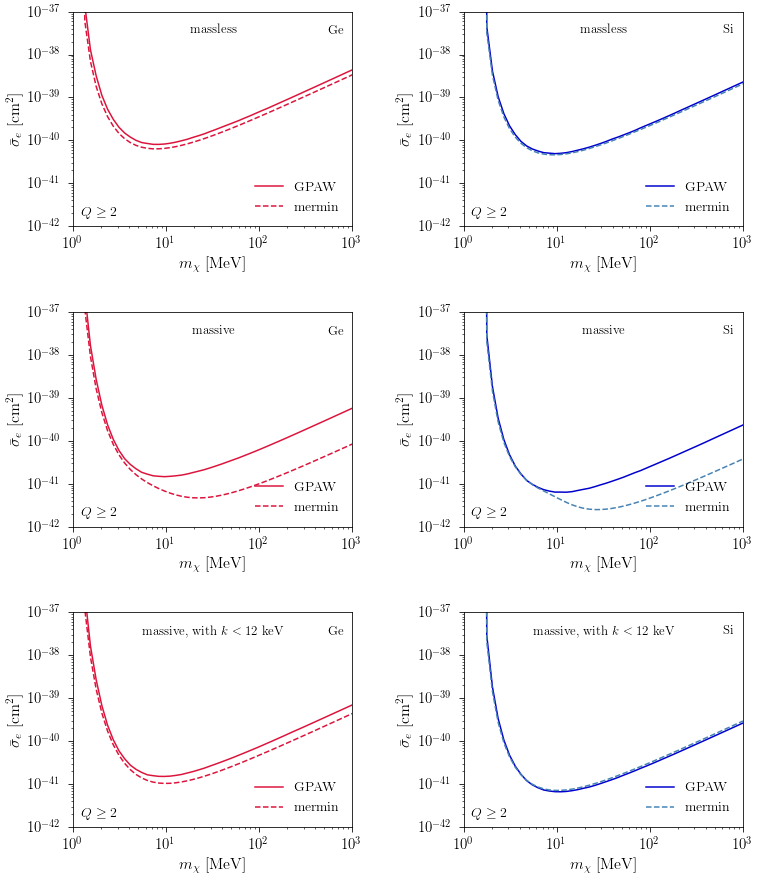

In [22]:
fig, axs = plt.subplots(3,2,figsize=(12,15))
fig.subplots_adjust(wspace=0.4,hspace=0.4)


# massless
axs[0][0].plot(masslist*1e-6,limit_Ge_GPAW_massless,"-",label="GPAW",color="Crimson")
axs[0][0].plot(masslist*1e-6,limit_Ge_mermin_massless,"--",label="mermin",color="Crimson")
axs[0][0].set_xscale("Log")
axs[0][0].set_yscale("Log")
axs[0][0].set_xlabel("$m_\chi$ [MeV]",fontsize=16)
axs[0][0].set_ylabel(r"$\bar \sigma_e$ [$\mathrm{cm}^2$]",fontsize=16)
axs[0][0].set_xlim([1,1e3])
axs[0][0].set_ylim([1e-42,1e-37])
axs[0][0].legend(frameon=False,loc="lower right")

axs[0][1].plot(masslist*1e-6,limit_Si_GPAW_massless,"-",label="GPAW",color="mediumblue")
axs[0][1].plot(masslist*1e-6,limit_Si_mermin_massless,"--",label="mermin",color="Steelblue")
axs[0][1].set_xscale("Log")
axs[0][1].set_yscale("Log")
axs[0][1].set_xlabel("$m_\chi$ [MeV]",fontsize=16)
axs[0][1].set_ylabel(r"$\bar \sigma_e$ [$\mathrm{cm}^2$]",fontsize=16)
axs[0][1].set_xlim([1,1e3])
axs[0][1].set_ylim([1e-42,1e-37])
axs[0][1].legend(frameon=False,loc="lower right")


axs[0][0].text(10**1.5,axs[0][0].get_ylim()[1]*.5,"massless",
            fontsize=13,verticalalignment='top',horizontalalignment='center')
axs[0][1].text(10**1.5,axs[0][0].get_ylim()[1]*.5,"massless",
            fontsize=13,verticalalignment='top',horizontalalignment='center')

axs[0][0].text(axs[0][0].get_xlim()[1]*.8,axs[0][0].get_ylim()[1]*.5,r"Ge",
            fontsize=13,verticalalignment='top',horizontalalignment='right')
axs[0][1].text(axs[0][1].get_xlim()[1]*.8,axs[0][1].get_ylim()[1]*.5,r"Si",
            fontsize=13,verticalalignment='top',horizontalalignment='right')

axs[0][0].text(axs[0][0].get_xlim()[0]*1.2,axs[0][0].get_ylim()[0]*3,r"$Q\geq 2$",
            fontsize=14,verticalalignment='top',horizontalalignment='left')

axs[0][1].text(axs[0][0].get_xlim()[0]*1.2,axs[0][0].get_ylim()[0]*3,r"$Q\geq 2$",
            fontsize=14,verticalalignment='top',horizontalalignment='left')



# massive
axs[1][0].plot(masslist*1e-6,limit_Ge_GPAW_massive,"-",label="GPAW",color="Crimson")
axs[1][0].plot(masslist*1e-6,limit_Ge_mermin_massive,"--",label="mermin",color="Crimson")
axs[1][0].set_xscale("Log")
axs[1][0].set_yscale("Log")
axs[1][0].set_xlabel("$m_\chi$ [MeV]",fontsize=16)
axs[1][0].set_ylabel(r"$\bar \sigma_e$ [$\mathrm{cm}^2$]",fontsize=16)
axs[1][0].set_xlim([1,1e3])
axs[1][0].set_ylim([1e-42,1e-37])
axs[1][0].legend(frameon=False,loc="lower right")

axs[1][1].plot(masslist*1e-6,limit_Si_GPAW_massive,"-",label="GPAW",color="mediumblue")
axs[1][1].plot(masslist*1e-6,limit_Si_mermin_massive,"--",label="mermin",color="Steelblue")
axs[1][1].set_xscale("Log")
axs[1][1].set_yscale("Log")
axs[1][1].set_xlabel("$m_\chi$ [MeV]",fontsize=16)
axs[1][1].set_ylabel(r"$\bar \sigma_e$ [$\mathrm{cm}^2$]",fontsize=16)
axs[1][1].set_xlim([1,1e3])
axs[1][1].set_ylim([1e-42,1e-37])
axs[1][1].legend(frameon=False,loc="lower right")

axs[1][0].text(10**1.5,axs[0][0].get_ylim()[1]*.5,"massive",
            fontsize=13,verticalalignment='top',horizontalalignment='center')
axs[1][1].text(10**1.5,axs[0][0].get_ylim()[1]*.5,"massive",
            fontsize=13,verticalalignment='top',horizontalalignment='center')

axs[1][0].text(axs[1][0].get_xlim()[1]*.8,axs[1][0].get_ylim()[1]*.5,r"Ge",
            fontsize=13,verticalalignment='top',horizontalalignment='right')
axs[1][1].text(axs[1][1].get_xlim()[1]*.8,axs[1][1].get_ylim()[1]*.5,r"Si",
            fontsize=13,verticalalignment='top',horizontalalignment='right')

axs[1][0].text(axs[1][0].get_xlim()[0]*1.2,axs[1][0].get_ylim()[0]*3,r"$Q\geq 2$",
            fontsize=14,verticalalignment='top',horizontalalignment='left')

axs[1][1].text(axs[1][0].get_xlim()[0]*1.2,axs[1][0].get_ylim()[0]*3,r"$Q\geq 2$",
            fontsize=14,verticalalignment='top',horizontalalignment='left')


# massive with k cut
axs[2][0].plot(masslist*1e-6,limit_Ge_GPAW_massive_kcut,"-",label="GPAW",color="Crimson")
axs[2][0].plot(masslist*1e-6,limit_Ge_mermin_massive_kcut,"--",label="mermin",color="Crimson")
axs[2][0].set_xscale("Log")
axs[2][0].set_yscale("Log")
axs[2][0].set_xlabel("$m_\chi$ [MeV]",fontsize=16)
axs[2][0].set_ylabel(r"$\bar \sigma_e$ [$\mathrm{cm}^2$]",fontsize=16)
axs[2][0].set_xlim([1,1e3])
axs[2][0].set_ylim([1e-42,1e-37])
axs[2][0].legend(frameon=False,loc="lower right")

axs[2][1].plot(masslist*1e-6,limit_Si_GPAW_massive_kcut,"-",label="GPAW",color="mediumblue")
axs[2][1].plot(masslist*1e-6,limit_Si_mermin_massive_kcut,"--",label="mermin",color="Steelblue")
axs[2][1].set_xscale("Log")
axs[2][1].set_yscale("Log")
axs[2][1].set_xlabel("$m_\chi$ [MeV]",fontsize=16)
axs[2][1].set_ylabel(r"$\bar \sigma_e$ [$\mathrm{cm}^2$]",fontsize=16)
axs[2][1].set_xlim([1,1e3])
axs[2][1].set_ylim([1e-42,1e-37])
axs[2][1].legend(frameon=False,loc="lower right")

axs[2][0].text(10**1.5,axs[0][0].get_ylim()[1]*.5,"massive, with $k<12$ keV",
            fontsize=13,verticalalignment='top',horizontalalignment='center')
axs[2][1].text(10**1.5,axs[0][0].get_ylim()[1]*.5,"massive, with $k<12$ keV",
            fontsize=13,verticalalignment='top',horizontalalignment='center')

axs[2][0].text(axs[2][0].get_xlim()[1]*.8,axs[2][0].get_ylim()[1]*.5,r"Ge",
            fontsize=13,verticalalignment='top',horizontalalignment='right')
axs[2][1].text(axs[2][1].get_xlim()[1]*.8,axs[2][1].get_ylim()[1]*.5,r"Si",
            fontsize=13,verticalalignment='top',horizontalalignment='right')

axs[2][0].text(axs[2][0].get_xlim()[0]*1.2,axs[2][0].get_ylim()[0]*3,r"$Q\geq 2$",
            fontsize=14,verticalalignment='top',horizontalalignment='left')

axs[2][1].text(axs[2][0].get_xlim()[0]*1.2,axs[2][0].get_ylim()[0]*3,r"$Q\geq 2$",
            fontsize=14,verticalalignment='top',horizontalalignment='left')


fig.savefig(plotdir+"darkelf_electron_7.pdf",bbox_inches='tight')
